<a href="https://colab.research.google.com/github/rosebaekfany/Machine-Learning/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Maleki

**Student ID**: 400110009





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

I need to use torch or cupy to makes it runable on gpu.
I use torch.

In [ ]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, learning_rate=0.05, num_epochs=200, batch_size=32):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.scaler = StandardScaler()
        self.model = nn.Linear(7, 1)
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)

        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

        for epoch in range(self.num_epochs):
            for i, (inputs, targets) in enumerate(dataloader):

                inputs = inputs.to(device)
                targets = targets.to(device)
                outputs = self.model(inputs)
                loss = self.loss(outputs, targets)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{self.num_epochs}, Loss: {loss.item()}")

    def predict(self, X):
        X_scaled = self.scaler.transform(X)

        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = X_tensor.to(device)

        with torch.no_grad():
            outputs = self.model(X_tensor)

        y_pred = torch.sigmoid(outputs).cpu().numpy()

        return y_pred.flatten()

    def loss(self, y_pred, y_true):

        return self.loss_fn(y_pred, y_true)

    pass

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
data = pd.read_csv('Logistic_question.csv')
print(data.head())

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0         47       11.8          4        4.5        4.5       9.65   
1         34       10.7          4        4.0        4.5       8.87   
2         26       10.4          3        3.0        3.5       8.00   
3         32       11.0          3        3.5        2.5       8.67   
4         24       10.3          2        2.0        3.0       8.21   

   Feature 7  Target  
0          1    0.92  
1          1    0.76  
2          1    0.72  
3          1    0.80  
4          0    0.65  


In [ ]:
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0.5 else 0)
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MyLogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 10/200, Loss: 0.2779524624347687
Epoch 20/200, Loss: 0.29011520743370056
Epoch 30/200, Loss: 0.1773461401462555
Epoch 40/200, Loss: 0.19269169867038727
Epoch 50/200, Loss: 0.3599705994129181
Epoch 60/200, Loss: 0.1182558536529541
Epoch 70/200, Loss: 0.2611558437347412
Epoch 80/200, Loss: 0.14203639328479767
Epoch 90/200, Loss: 0.052083007991313934
Epoch 100/200, Loss: 0.10353375226259232
Epoch 110/200, Loss: 0.14447498321533203
Epoch 120/200, Loss: 0.08275137096643448
Epoch 130/200, Loss: 0.20399662852287292
Epoch 140/200, Loss: 0.10700931400060654
Epoch 150/200, Loss: 0.08751626312732697
Epoch 160/200, Loss: 0.10247841477394104
Epoch 170/200, Loss: 0.1054399162530899
Epoch 180/200, Loss: 0.10184996575117111
Epoch 190/200, Loss: 0.20683801174163818
Epoch 200/200, Loss: 0.06633664667606354
Accuracy: 0.925
Precision: 0.9210526315789473
Recall: 1.0
F1 Score: 0.958904109589041


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

Accuracy: the proportion of correctly predicted samples in a test set. Accuracy is suitable for balanced datasets and tasks where all classes need to be classified correctly.

Precision: Measures the proportion of correctly predicted positive samples out of all predicted positives. Useful when minimizing false positives is important, such as in medical diagnosis.

Recall: Calculates the proportion of correctly predicted positive samples out of all actual positives. Useful when minimizing false negatives is crucial, such as in fraud detection or rare disease identification.

F1 Score: The harmonic mean of precision and recall, balancing both metrics. Suitable when considering false positives and false negatives is important, such as in information retrieval or text classification.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
data = pd.read_csv('Logistic_question.csv')
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0.5 else 0)
X = data.drop('Target', axis=1).values
y = data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9500
Precision: 0.9459
Recall: 1.0000
F1-score: 0.9722


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

Penalty: Determines the type of regularization to be applied (L1 or L2).

C: Controls the trade-off between fitting the training data and preventing overfitting.

Solver: Determines the algorithm used to solve the optimization problem.

Max_iter: Sets the maximum number of iterations for convergence.

Class_weight: Allows for assigning different weights to different classes in the target variable.

These parameters impact the model's complexity, convergence speed, handling of large datasets, and ability to handle class imbalances.

A custom logistic regression function provides flexibility and insight into the model's inner workings, the built-in logistic regression function from Scikit-learn offers several advantages. It provides optimized performance, advanced features, and efficient parameter tuning capabilities. This makes it a preferred choice for practical applications, especially with large-scale datasets. The built-in function is designed to handle various scenarios effectively and is well-optimized for performance, allowing for more efficient training and prediction processes. Additionally, Scikit-learn provides convenient tools for cross-validation and hyperparameter tuning, enabling users to find the optimal parameter values for their specific problem easily.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
class MyMultinomialLogisticRegression:

    def __init__(self, learning_rate=0.05, num_epochs=200, batch_size=32):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.scaler = StandardScaler()
        self.model = None
        self.loss_fn = nn.CrossEntropyLoss()
        self.optimizer = None

    def fit(self, X, y):
        num_features = X.shape[1]
        num_classes = len(set(y))

        self.model = nn.Linear(num_features, num_classes)
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        X_scaled = self.scaler.fit_transform(X)
        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

        for epoch in range(self.num_epochs):
            for inputs, targets in dataloader:
                inputs = inputs.to(device)
                targets = targets.to(device)

                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)
                loss.backward()
                self.optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{self.num_epochs}, Loss: {loss.item()}")

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = X_tensor.to(device)

        with torch.no_grad():
            outputs = self.model(X_tensor)

        _, predicted_labels = torch.max(outputs, 1)
        predicted_labels = predicted_labels.cpu().numpy()

        return predicted_labels

    def loss(self, y_pred, y_true):
        return self.loss_fn(y_pred, y_true)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
data = pd.read_csv('Logistic_question.csv')
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0.5 else 0)
X = data.drop('Target', axis=1).values
y = data['Target'].values

for num_levels in range(2, 11):
    print(f"Quantization Level: {num_levels}")

    discretizer = KBinsDiscretizer(n_bins=num_levels, encode="ordinal")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Quantization Level: 2
Epoch 10/200, Loss: 0.27591943740844727
Epoch 20/200, Loss: 0.16800615191459656
Epoch 30/200, Loss: 0.1571761518716812
Epoch 40/200, Loss: 0.09795619547367096
Epoch 50/200, Loss: 0.15889331698417664
Epoch 60/200, Loss: 0.19519264996051788
Epoch 70/200, Loss: 0.20060524344444275
Epoch 80/200, Loss: 0.10897186398506165
Epoch 90/200, Loss: 0.2550385892391205
Epoch 100/200, Loss: 0.13332341611385345
Epoch 110/200, Loss: 0.22735659778118134
Epoch 120/200, Loss: 0.12178438156843185
Epoch 130/200, Loss: 0.185542032122612
Epoch 140/200, Loss: 0.07059450447559357
Epoch 150/200, Loss: 0.15709732472896576
Epoch 160/200, Loss: 0.2889235019683838
Epoch 170/200, Loss: 0.059724606573581696
Epoch 180/200, Loss: 0.10155331343412399
Epoch 190/200, Loss: 0.11380846053361893
Epoch 200/200, Loss: 0.10137495398521423
Accuracy: 0.95
Quantization Level: 3
Epoch 10/200, Loss: 0.26157528162002563
Epoch 20/200, Loss: 0.21668313443660736
Epoch 30/200, Loss: 0.23102644085884094
Epoch 40/200, 

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:** Looking at the loss at 200 epoch for i=2 we have a better performance.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google.colab'

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find either /content/adult-income-dataset.zip or /content/adult-income-dataset.zip.zip.


**Task:** Determine the number of null entries!

In [ ]:
data = pd.read_csv('adult.csv')
print(data.head())
null_counts = data.isnull().sum()
print(null_counts)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Dropping Rows or Columns: Remove rows or columns with null values. Suitable when null values are limited and won't significantly impact analysis.

Imputation: Fill null values with estimated or calculated values (e.g., mean, median, mode). Simple techniques or advanced methods like regression or k-nearest neighbors imputation.

Forward Fill or Backward Fill: Fill null values with nearest preceding or succeeding non-null value. Useful for time series or ordered data.

Creating Indicator Variables: Add binary column to indicate missing values. Helps capture patterns or relationships associated with missing data.

Domain-specific Substitution: Use domain knowledge to substitute null values with reasonable estimates based on dataset and problem understanding.

The choice of method depends on factors like missing data amount, pattern, dataset nature, analysis goals, and downstream impact.

**Task:** Handle null entries using your best method.

In [ ]:
columns_with_null = data.columns[data.isnull().any()]
if len(columns_with_null) > 0:
    imputer = SimpleImputer(strategy='mean')
    data[columns_with_null] = imputer.fit_transform(data[columns_with_null])


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
X1 = pd.DataFrame(X)
categorical_features = X1.select_dtypes(include=['object']).columns

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}


model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.95
Test Accuracy: 0.95


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, learning_rate=0.05, num_epochs=200, batch_size=32):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.scaler = StandardScaler()
        self.model = nn.Linear(7, 1)
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)

        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)  # Reshape y to (batch_size, 1)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

        for epoch in range(self.num_epochs):
            for i, (inputs, targets) in enumerate(dataloader):
                inputs = inputs.to(device)
                targets = targets.view(-1, 1).to(device)  # Reshape targets to (batch_size, 1)
                outputs = self.model(inputs)
                loss = self.loss(outputs, targets)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{self.num_epochs}, Loss: {loss.item()}")

    def predict(self, X):
        X_scaled = self.scaler.transform(X)

        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        X_tensor = X_tensor.to(device)

        with torch.no_grad():
            outputs = self.model(X_tensor)

        y_pred = torch.sigmoid(outputs).cpu().numpy()

        return y_pred.flatten()

    def loss(self, y_pred, y_true):

        return self.loss_fn(y_pred, y_true)

    pass

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

i = 10
X_train_parts = np.array_split(X_train, i)
y_train_parts = np.array_split(y_train, i)

models = []
for j in range(i):
    model = MyLogisticRegression()
    model.fit(X_train_parts[j], y_train_parts[j])
    models.append(model)

def voting_ensemble(models, X):
    results = np.array([model.predict(X) for model in models])
    return np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=0, arr=results)

def weighted_voting_ensemble(models, weights, X):
    results = np.array([model.predict(X) for model in models])
    weighted_results = np.average(results, axis=0, weights=weights)
    return np.round(weighted_results).astype(int)

def averaging_ensemble(models, X):
    results = np.array([model.predict(X) for model in models])
    return np.round(np.mean(results, axis=0)).astype(int)

voting_predictions = voting_ensemble(models, X_test)
weighted_voting_predictions = weighted_voting_ensemble(models, weights=None, X=X_test)
averaging_predictions = averaging_ensemble(models, X_test)

voting_accuracy = accuracy_score(y_test, voting_predictions)
weighted_voting_accuracy = accuracy_score(y_test, weighted_voting_predictions)
averaging_accuracy = accuracy_score(y_test, averaging_predictions)

print("Voting Accuracy:", voting_accuracy)
print("Weighted Voting Accuracy:", weighted_voting_accuracy)
print("Averaging Accuracy:", averaging_accuracy)

Epoch 10/200, Loss: 0.7182658314704895
Epoch 20/200, Loss: 0.6108105778694153
Epoch 30/200, Loss: 0.5275748372077942
Epoch 40/200, Loss: 0.4622161090373993
Epoch 50/200, Loss: 0.41024553775787354
Epoch 60/200, Loss: 0.3684062063694
Epoch 70/200, Loss: 0.33430564403533936
Epoch 80/200, Loss: 0.306175172328949
Epoch 90/200, Loss: 0.2826988399028778
Epoch 100/200, Loss: 0.2628902196884155
Epoch 110/200, Loss: 0.24600344896316528
Epoch 120/200, Loss: 0.23146912455558777
Epoch 130/200, Loss: 0.2188481092453003
Epoch 140/200, Loss: 0.2077983021736145
Epoch 150/200, Loss: 0.19805067777633667
Epoch 160/200, Loss: 0.18939143419265747
Epoch 170/200, Loss: 0.1816493421792984
Epoch 180/200, Loss: 0.17468583583831787
Epoch 190/200, Loss: 0.1683879792690277
Epoch 200/200, Loss: 0.162663072347641
Epoch 10/200, Loss: 0.6443040370941162
Epoch 20/200, Loss: 0.5584699511528015
Epoch 30/200, Loss: 0.49956226348876953
Epoch 40/200, Loss: 0.45479583740234375
Epoch 50/200, Loss: 0.4190438687801361
Epoch 60/2

**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

Voting Ensemble: Combines predictions by majority voting to make a final decision based on the most frequent class prediction. Helps reduce individual model biases and improve overall accuracy.

Weighted Voting Ensemble: Assigns weights to model predictions and combines them using weighted voting. Useful when models have varying degrees of accuracy or reliability.

Averaging Ensemble: Combines predictions by averaging probabilities or logits across models. Effective when models provide probability estimates or confidence scores for each class.

These ensemble methods aim to leverage the collective intelligence of multiple models, mitigating individual weaknesses and enhancing overall prediction performance.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Epoch 10/50, Loss: 0.32200494408607483
Epoch 20/50, Loss: 0.3237045407295227
Epoch 30/50, Loss: 0.11136426031589508
Epoch 40/50, Loss: 0.296258807182312
Epoch 50/50, Loss: 0.22524578869342804
Epoch 10/50, Loss: 0.33972784876823425
Epoch 20/50, Loss: 0.1812022477388382
Epoch 30/50, Loss: 0.22211456298828125
Epoch 40/50, Loss: 0.19920851290225983
Epoch 50/50, Loss: 0.2144821584224701
Epoch 10/50, Loss: 0.27308619022369385
Epoch 20/50, Loss: 0.17106616497039795
Epoch 30/50, Loss: 0.2450307011604309
Epoch 40/50, Loss: 0.2984449863433838
Epoch 50/50, Loss: 0.29025715589523315
Epoch 10/50, Loss: 0.2973611354827881
Epoch 20/50, Loss: 0.2986970543861389
Epoch 30/50, Loss: 0.2737152576446533
Epoch 40/50, Loss: 0.14469313621520996
Epoch 50/50, Loss: 0.2466650754213333
Epoch 10/50, Loss: 0.3034728169441223
Epoch 20/50, Loss: 0.2812255918979645
Epoch 30/50, Loss: 0.3442821502685547
Epoch 40/50, Loss: 0.1659342497587204
Epoch 50/50, Loss: 0.13300490379333496
Epoch 10/50, Loss: 0.36110806465148926
E

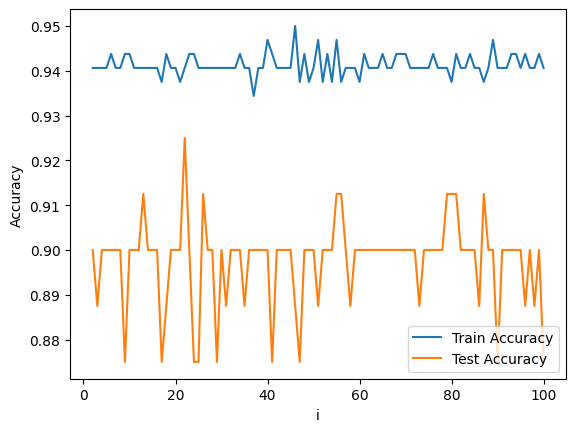

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model = None
best_test_accuracy = 0.0
train_accuracies = []
test_accuracies = []

for i in range(2, 101):
    model = MyLogisticRegression(num_epochs=50, learning_rate=0.05, batch_size=32)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

    y_test_pred = model.predict(X_test)
    y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

    train_accuracy = accuracy_score(y_train, y_train_pred_binary)
    test_accuracy = accuracy_score(y_test, y_test_pred_binary)


    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    if test_accuracy > best_test_accuracy:
        best_model = model
        best_test_accuracy = test_accuracy

best_model_index = test_accuracies.index(best_test_accuracy)
best_model_i = best_model_index + 2

print("Best Model:")
print(f"i: {best_model_i}")
print(f"Train Accuracy: {train_accuracies[best_model_index]}")
print(f"Test Accuracy: {best_test_accuracy}")

# Plotting the accuracies
x = range(2, 101)
plt.plot(x, train_accuracies, label='Train Accuracy')
plt.plot(x, test_accuracies, label='Test Accuracy')
plt.xlabel('i')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Question:** Analyze the results.

**Your Answer:** it is better to have bigger training part but in this case the difference is not much